# Furierova transformace

$$ \mathcal{F} \{ s(t) \} = S(\omega) = \int_{-\infty}^{+\infty} s(t) e^{-j\omega t} dt $$
$$ \mathcal{F}^{-1} \{ S(\omega) \} = \frac{1}{2\pi} s(t) = \int_{-\infty}^{+\infty} S(\omega) e^{j \omega t} d\omega $$

## Diskrétní Furierova transformace

Slouží k Získání sektra s navzorkovaného signálu.

$$ \mathcal{DFT} \{ s_k \} = S_k = \sum_{n=0}^{N-1} s_k e^{-j2\pi nk / N} $$

## Inverzní diskrétní Furierova transformace

Sloužík získání vzorkovaného signálu z jeho spektra.

$$ \mathcal{DFT}^{-1} \{ S_k \} = s_k = \frac{1}{N} \sum_{n=0}^{N-1} S_k e^{j2\pi nk /N} $$


In [83]:
import numpy as np
from numpy import pi, abs, sin, exp
from matplotlib import pyplot as plt

## Vytvoření testovacích dat:

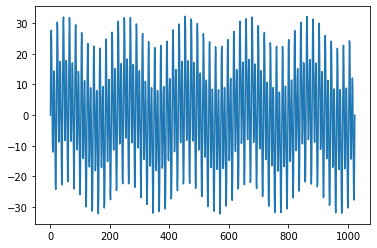

In [84]:
t = np.linspace(0, 1, 1024)
s = 20 * sin(2*pi*100*t)
s += 10 * sin(2*pi*50*t)
s += 5 * sin(2*pi*5*t)

plt.plot(s)
plt.show()

## Pomocné proměnné:

In [85]:
N = len(s) # počet vzorků
n = np.arange(N) / N # sroky posunu, pro zrychlení devinovány jako vektor

## Výpočet DFT:

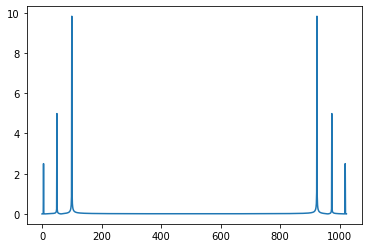

In [86]:
S = np.array(
    [
        sum(
            s * exp(-1j * 2 * pi *k *n)
        )
        for k in range(N)
    ]
) / N

plt.plot(abs(S))
plt.show()

## Detail spektra
Spektrum je souměrné okolo poloviny vzorkovací frekvence proto pro získání korektního spektra je třeba vzít jen první část a jeho hodnot yvynásobit dvěmi.

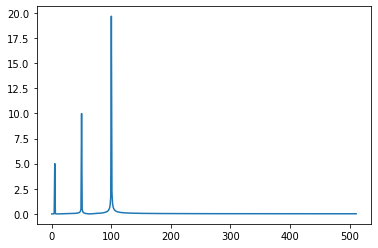

In [87]:
plt.plot(abs(S)[:N//2] * 2)
plt.show()

## Výpočet IDFT:

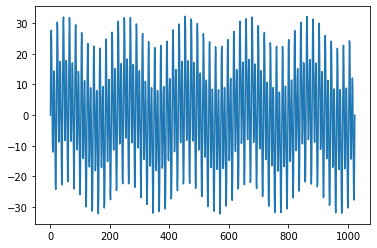

In [89]:
recovery = np.array(
    [
        sum(
            S * exp(1j * 2 * pi *k *n)
        )
        for k in range(N)
    ]
)

plt.plot(recovery.real)
plt.show()

## Srovnání vstupního signálu z rekonstruovaným:

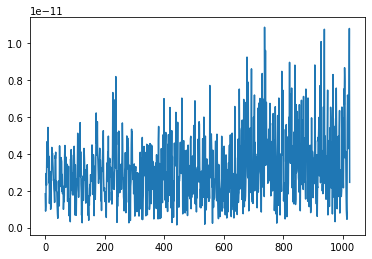

In [90]:
plt.plot(abs(s - recovery))
plt.show()